Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the file

df = pd.read_csv('student_habits_performance.csv')
df.info()
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.50,3.55,2.51,1.82,84.13,6.47,3.04,5.44,69.60
std,2.31,1.47,1.17,1.08,9.40,1.23,2.03,2.85,16.89
min,17.00,0.00,0.00,0.00,56.00,3.20,0.00,1.00,18.40
25%,18.75,2.60,1.70,1.00,78.00,5.60,1.00,3.00,58.48
50%,20.00,3.50,2.50,1.80,84.40,6.50,3.00,5.00,70.50
75%,23.00,4.50,3.30,2.52,91.02,7.30,5.00,8.00,81.32
max,24.00,8.30,7.20,5.40,100.00,10.00,6.00,10.00,100.00


what am i learning with this analisys?

do sleep hourns impacted mental health?
do sleep hourns impacted exam score?
do study hours impacted exam score?
are exercises frequency, sleep hours and diet quality is enough for good mental health?

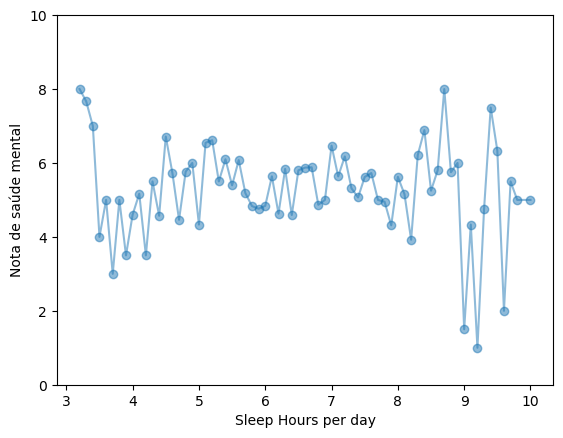

In [3]:
# do sleep hourns impacted mental health?

sleep_hours = df.groupby('sleep_hours')['mental_health_rating'].mean().reset_index()

# Gráfico
plt.xlabel('Sleep Hours per day')
plt.ylabel('Nota de saúde mental')
plt.ylim(0,10)
plt.scatter(sleep_hours['sleep_hours'], sleep_hours['mental_health_rating'], alpha=0.5)
plt.plot(sleep_hours['sleep_hours'], sleep_hours['mental_health_rating'], alpha=0.5)

# No impacted

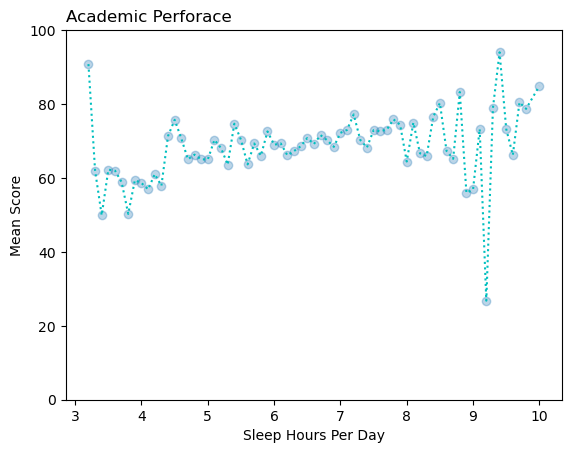

In [4]:
# Do sleep hourns impacted exam score?
sleep_hours = df.groupby('sleep_hours')['exam_score'].mean().reset_index()

# plot
plt.title('Academic Perforace', loc='left')
plt.ylabel('Mean Score')
plt.ylim(0, 100)
plt.xlabel('Sleep Hours Per Day')
plt.scatter(sleep_hours['sleep_hours'], sleep_hours['exam_score'], alpha=0.3)
plt.plot(sleep_hours['sleep_hours'], sleep_hours['exam_score'], ':c')
plt.show()

# ensware: No impacted 

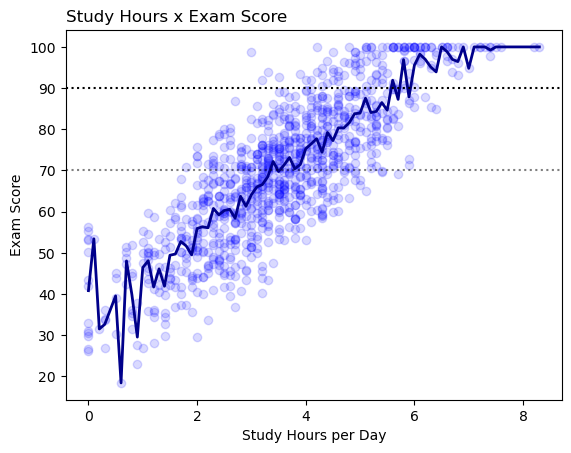

In [5]:
# do study hours impacted exam score?

study_hours = df.groupby('study_hours_per_day')['exam_score'].mean().reset_index()

# Plot
plt.title('Study Hours x Exam Score', loc='left')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.plot(study_hours['study_hours_per_day'], study_hours['exam_score'], linewidth=2, c='darkblue')
plt.scatter(df['study_hours_per_day'], df['exam_score'], alpha=0.15, c='blue')
plt.axhline(y=70, linestyle=':', c='k', alpha=0.5)
plt.axhline(y=90, linestyle=':', c='k')

# There are a direct relacionship unther this two topcs

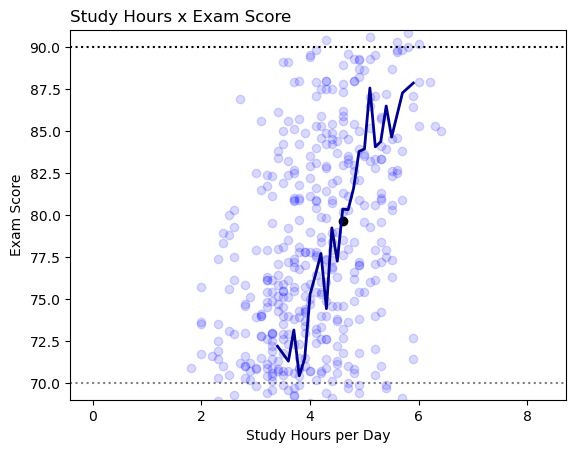

In [6]:
# Qual a média de horas de estudo entre as pessoas que tiram entre 70 e 90 pontos? plotar grafico

study_hours = study_hours[(study_hours['exam_score'] >= 70) & (study_hours['exam_score'] <= 90)]

# Plot
plt.title('Study Hours x Exam Score', loc='left')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.ylim(69, 91)
plt.plot(study_hours['study_hours_per_day'], study_hours['exam_score'], linewidth=2, c='darkblue')
plt.scatter(df['study_hours_per_day'], df['exam_score'], alpha=0.15, c='blue')
plt.axhline(y=70, linestyle=':', c='k', alpha=0.5)
plt.axhline(y=90, linestyle=':', c='k')

plt.scatter(study_hours['study_hours_per_day'].mean(), study_hours['exam_score'].mean(), c='k')

# The ideal is to study between 4 and 5 hours a day 

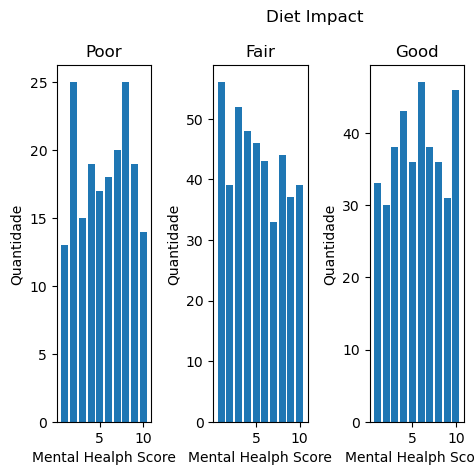

In [7]:
# are exercises frequency, sleep hours and diet quality is enough for good mental health?

# Diet
body_health = df[['exercise_frequency', 'sleep_hours', 'diet_quality', 'mental_health_rating']]
diet_list = np.array(['Poor', 'Fair', 'Good'])

lista = np.array([])

# Plot
plt.suptitle('Diet Impact')

for i in range(0,3):
    diet = body_health[body_health['diet_quality'] == diet_list[i]].groupby('mental_health_rating').size().reset_index()
    diet = diet.rename(columns={0 : 'Sum'})
    
    plt.subplot(1,4,i+1)
    plt.title(diet_list[i])
    plt.xlabel('Mental Healph Score')
    plt.ylabel('Quantidade')
    plt.bar(diet['mental_health_rating'], diet['Sum'])

    lista = np.append(lista, body_health.loc[body_health['diet_quality'] == diet_list[i], 'mental_health_rating'].mean()).round(2)

plt.tight_layout()



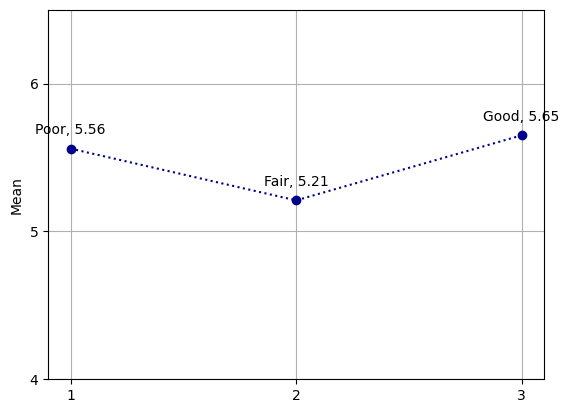

In [8]:
# plot 2 - showing that the averages are similar
nomes = np.array([])
for i in range(3):
    nomes = np.append(nomes, f'{diet_list[i]}, {lista[i]}')

plt.plot(np.array([1,2,3]), lista, 'o:', c='darkblue')

# Y
plt.ylabel('Mean')
plt.ylim(4.5,6.5)
plt.yticks(np.array([4,5,6]))

# X
plt.xticks(np.array([1,2,3]))


for i in range(3):
    plt.text(np.array([1,2,3])[i], lista[i] + 0.1, nomes[i], ha='center')

plt.grid(True)
plt.show()

# the diet not impact mental health

Text(0, 0.5, 'mental health_rating')

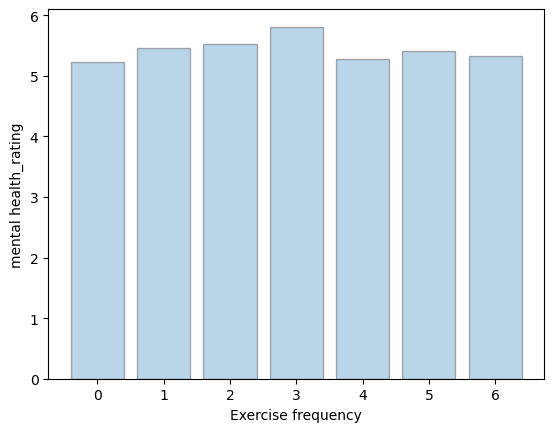

In [9]:
exercises = body_health.groupby('exercise_frequency')['mental_health_rating'].mean().reset_index()

plt.bar(exercises['exercise_frequency'], exercises['mental_health_rating'], edgecolor='k', alpha=0.3)
plt.xlabel('Exercise frequency')
plt.ylabel('mental health_rating')

# No relacionship